# Portuguese Bank Marketing

## Data Set Information:
#### The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).
## Attribute Information:
## bank client data:
* #### 1 - age (numeric)
* #### 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services") 
* #### 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
* #### 4 - education (categorical: "unknown","secondary","primary","tertiary")
* #### 5 - default: has credit in default? (binary: "yes","no")
* #### 6 - balance: average yearly balance, in euros (numeric) 
* #### 7 - housing: has housing loan? (binary: "yes","no")
* #### 8 - loan: has personal loan? (binary: "yes","no")
## related with the last contact of the current campaign:
* #### 9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
* #### 10 - day: last contact day of the month (numeric)
* #### 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
* #### 12 - duration: last contact duration, in seconds (numeric)
## other attributes:
* #### 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* #### 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
* #### 15 - previous: number of contacts performed before this campaign and for this client (numeric)
* #### 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
## Output variable (desired target):
* #### 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

## Loading the main libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank-full.csv', delimiter=';')
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### No missing values in the dataset.

In [4]:
df.shape

(45211, 17)

In [5]:
df.describe().T

count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0

In [6]:
df.describe(include='object').T

count unique          top   freq
job        45211     12  blue-collar   9732
marital    45211      3      married  27214
education  45211      4    secondary  23202
default    45211      2           no  44396
housing    45211      2          yes  25130
loan       45211      2           no  37967
contact    45211      3     cellular  29285
month      45211     12          may  13766
poutcome   45211      4      unknown  36959
y          45211      2           no  39922

In [7]:
print(f"Categorical Attributes Unique")
for col in df.describe(include='object'):
    print(f"{'='*75}\n{col} ({df[col].nunique()} unique):\n{df[col].unique()}")

Categorical Attributes Unique
job (12 unique):
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital (3 unique):
['married' 'single' 'divorced']
education (4 unique):
['tertiary' 'secondary' 'unknown' 'primary']
default (2 unique):
['no' 'yes']
housing (2 unique):
['yes' 'no']
loan (2 unique):
['no' 'yes']
contact (3 unique):
['unknown' 'cellular' 'telephone']
month (12 unique):
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome (4 unique):
['unknown' 'failure' 'other' 'success']
y (2 unique):
['no' 'yes']


# Exploratory Data Analysis

## Categorical Feature Count Plot

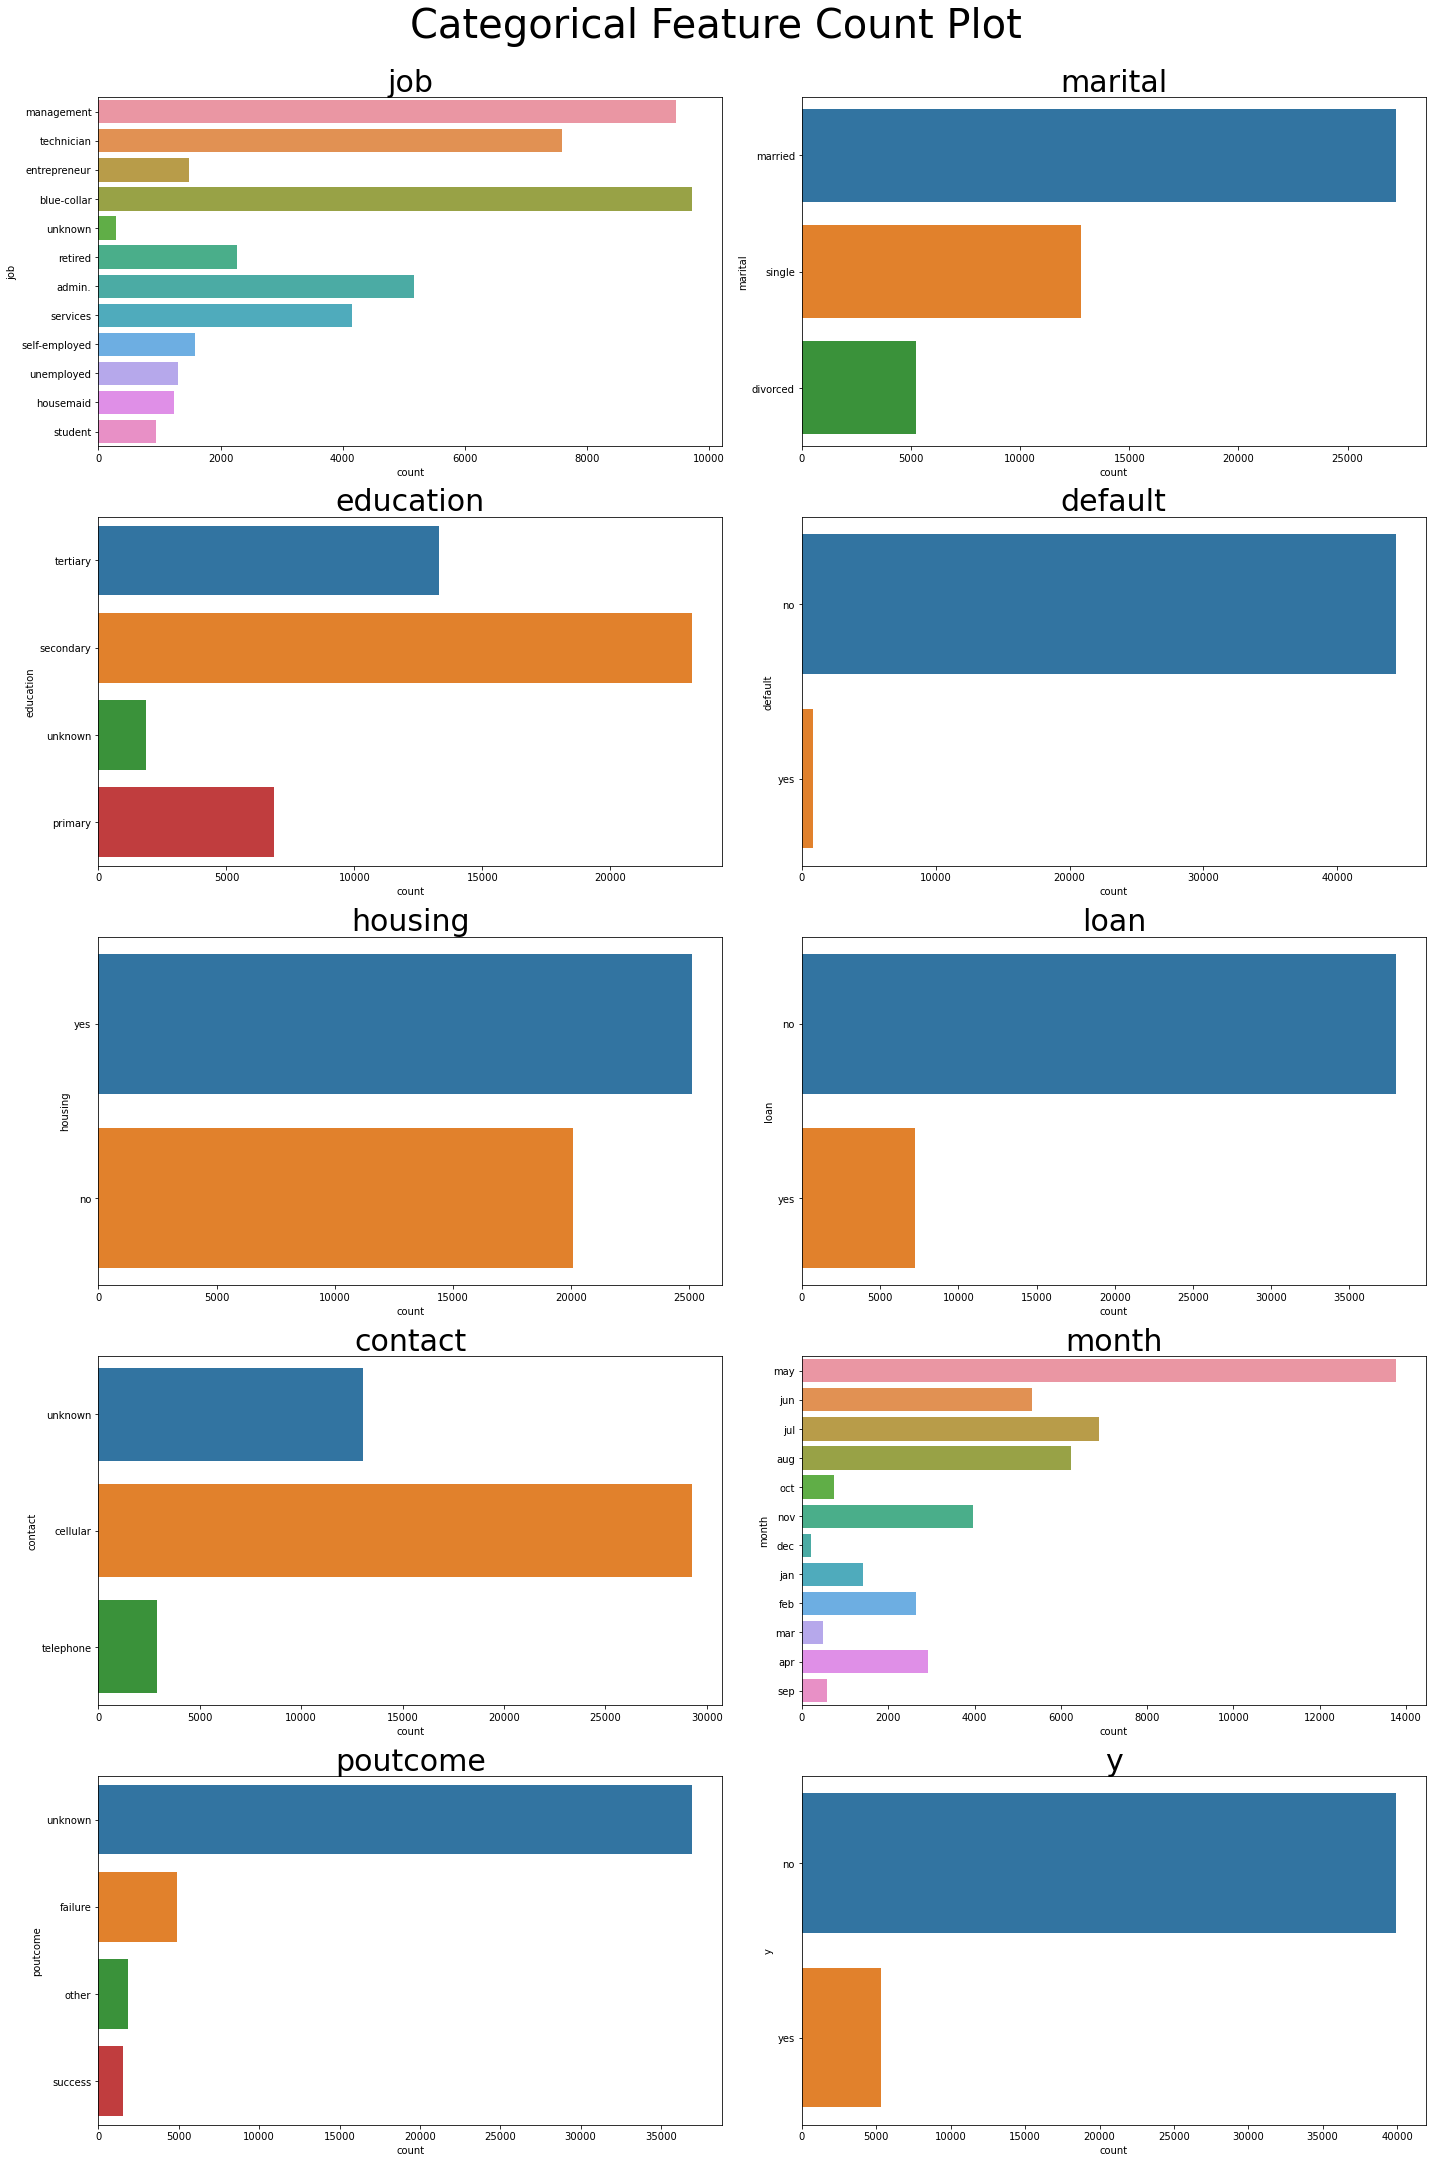

In [8]:
fig = plt.figure(figsize=(20,30))
plot = 1
for col in df.describe(include='object').columns:
    ax = plt.subplot(5,2,plot)
    sns.countplot(y=col, data=df, ax=ax)
    ax.set_title(col, fontsize=30)
    plot += 1
fig.suptitle('Categorical Feature Count Plot', fontsize=40, y=1)
plt.tight_layout()
plt.show()

* #### Blue-collar workers are the most frequent type in this dataset, followed by management and technician.
* #### Most customers are married.
* #### Most customers have a high-school education, followed by Tertiary(College/Trade School).
* #### The vast majority of customers have not defaulted on their loans.
* #### Most customers were successfully reached via cellphone calls.
* #### Most customer contancts occur in May and the least occur in December.
* #### For most customers the outcome of the previous marketing campaign is unknown.
* #### Most clients have not subscribed for a term deposit.
* #### There is an imbalance for the dependent variable (outcome of term deposit), with significantly more rejections than acceptances.

# Relationship Between Categorical Features and Label

## Job

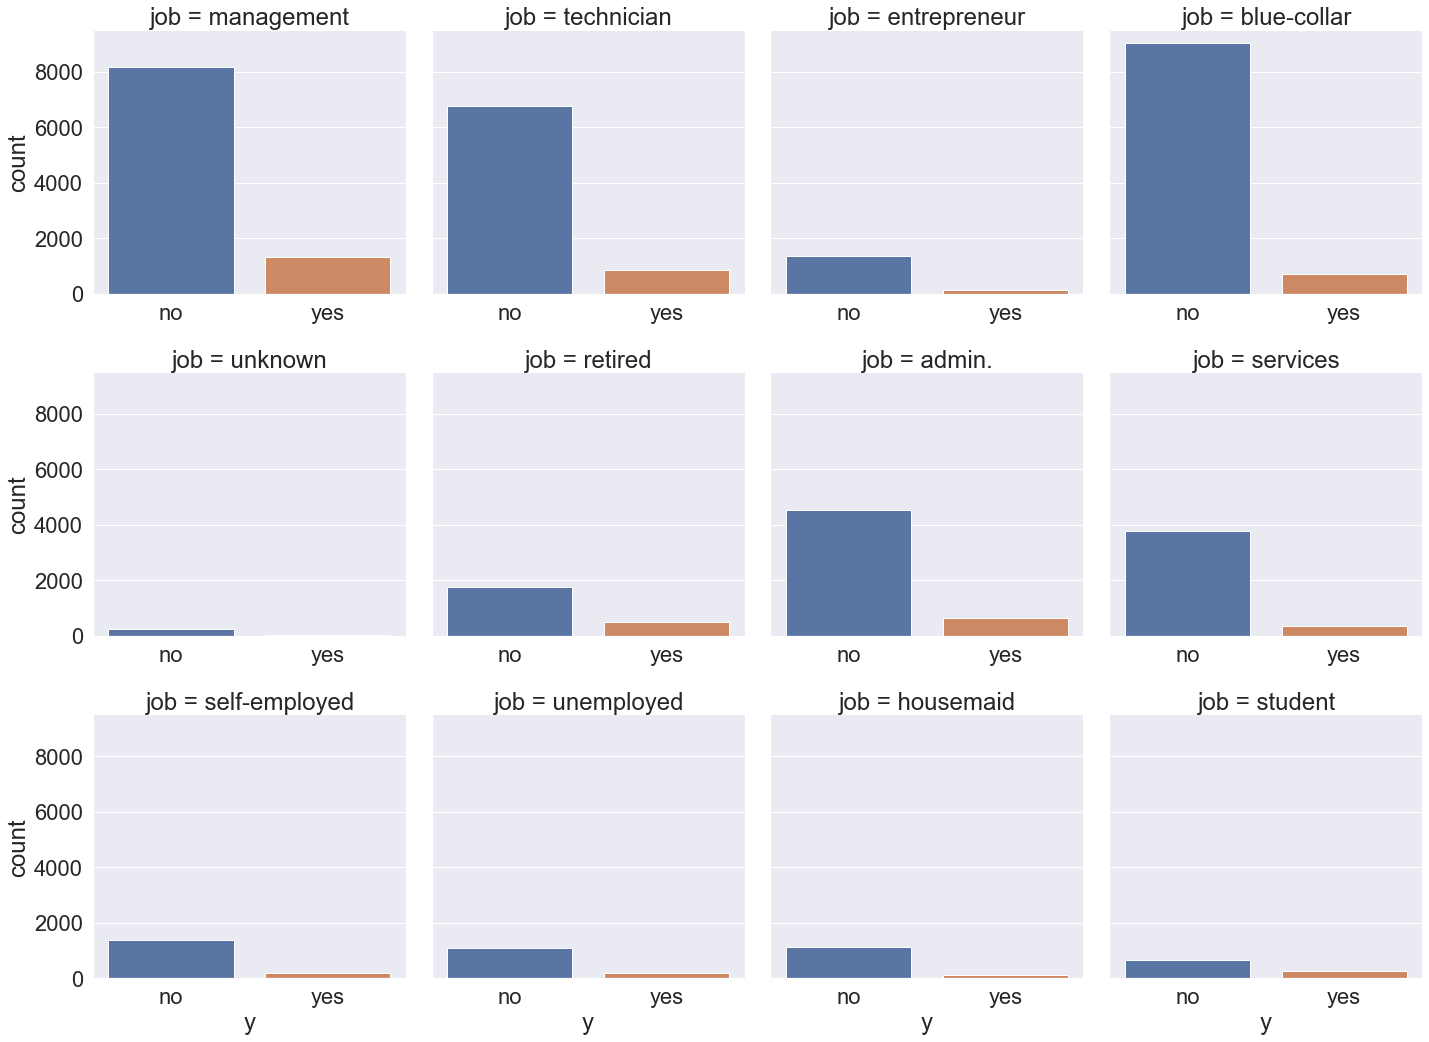

In [9]:
sns.set(font_scale=2)
g = sns.catplot(x='y', col='job', kind='count', data=df, col_wrap=4, sharex=False)
plt.show()

* #### Clients working in management have high interest on deposit.
* #### Blue-collar workers are least-likely to to get a term deposit.

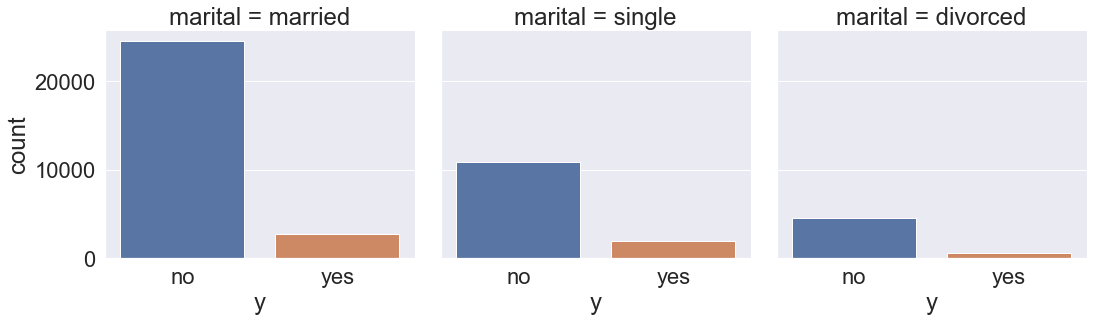

In [10]:
g = sns.catplot(x='y', col='marital', kind='count', data=df, col_wrap=4)
plt.show()

* #### Married clients are more likely to accept a term deposit.

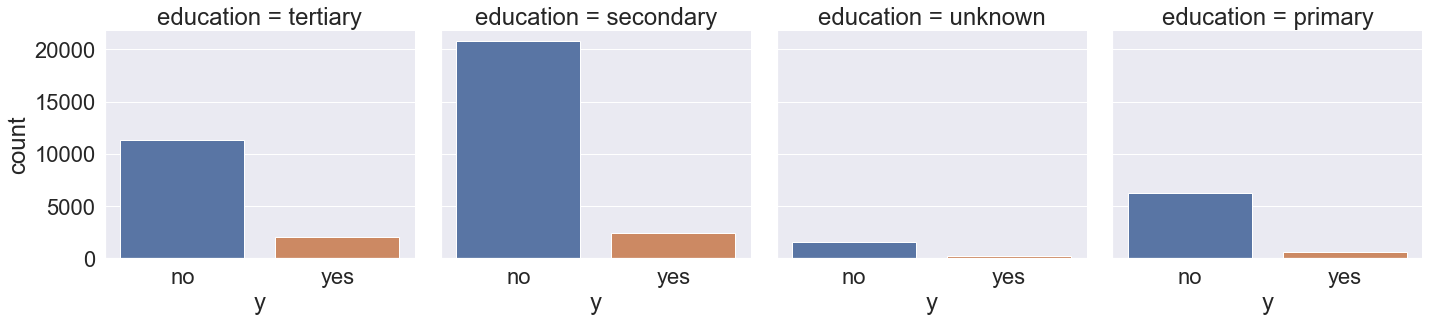

In [11]:
g = sns.catplot(x='y', col='education', kind='count', data=df, col_wrap=4)
plt.show()

* #### Clients with secondary education and above are more likely to accept a term deposit.

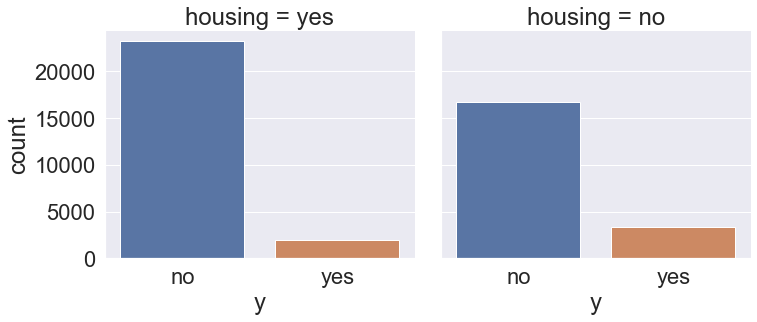

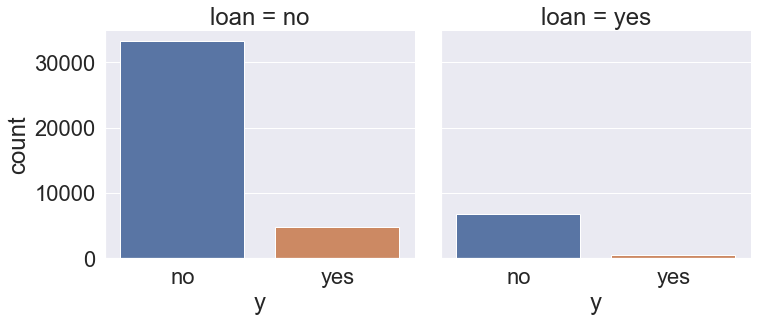

In [12]:
g = sns.catplot(x='y', col='housing', kind='count', data=df, col_wrap=4)
g = sns.catplot(x='y', col='loan', kind='count', data=df, col_wrap=4)
plt.show()

* #### Clients without a housing loan are more likely to accept a term deposit.
* #### Clients without a personal loan are more likely to accept a term deposit.

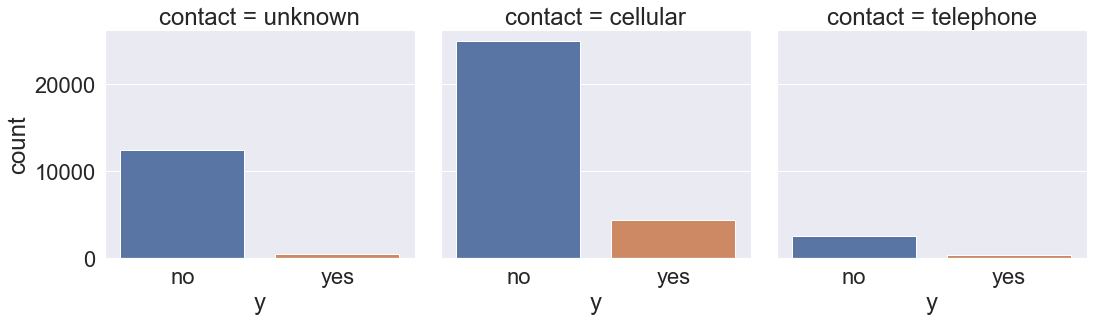

In [13]:
g = sns.catplot(x='y', col='contact', kind='count', data=df, col_wrap=4)
plt.show()

* #### Clients contacted by cellphone are more likely to accept a term deposit.

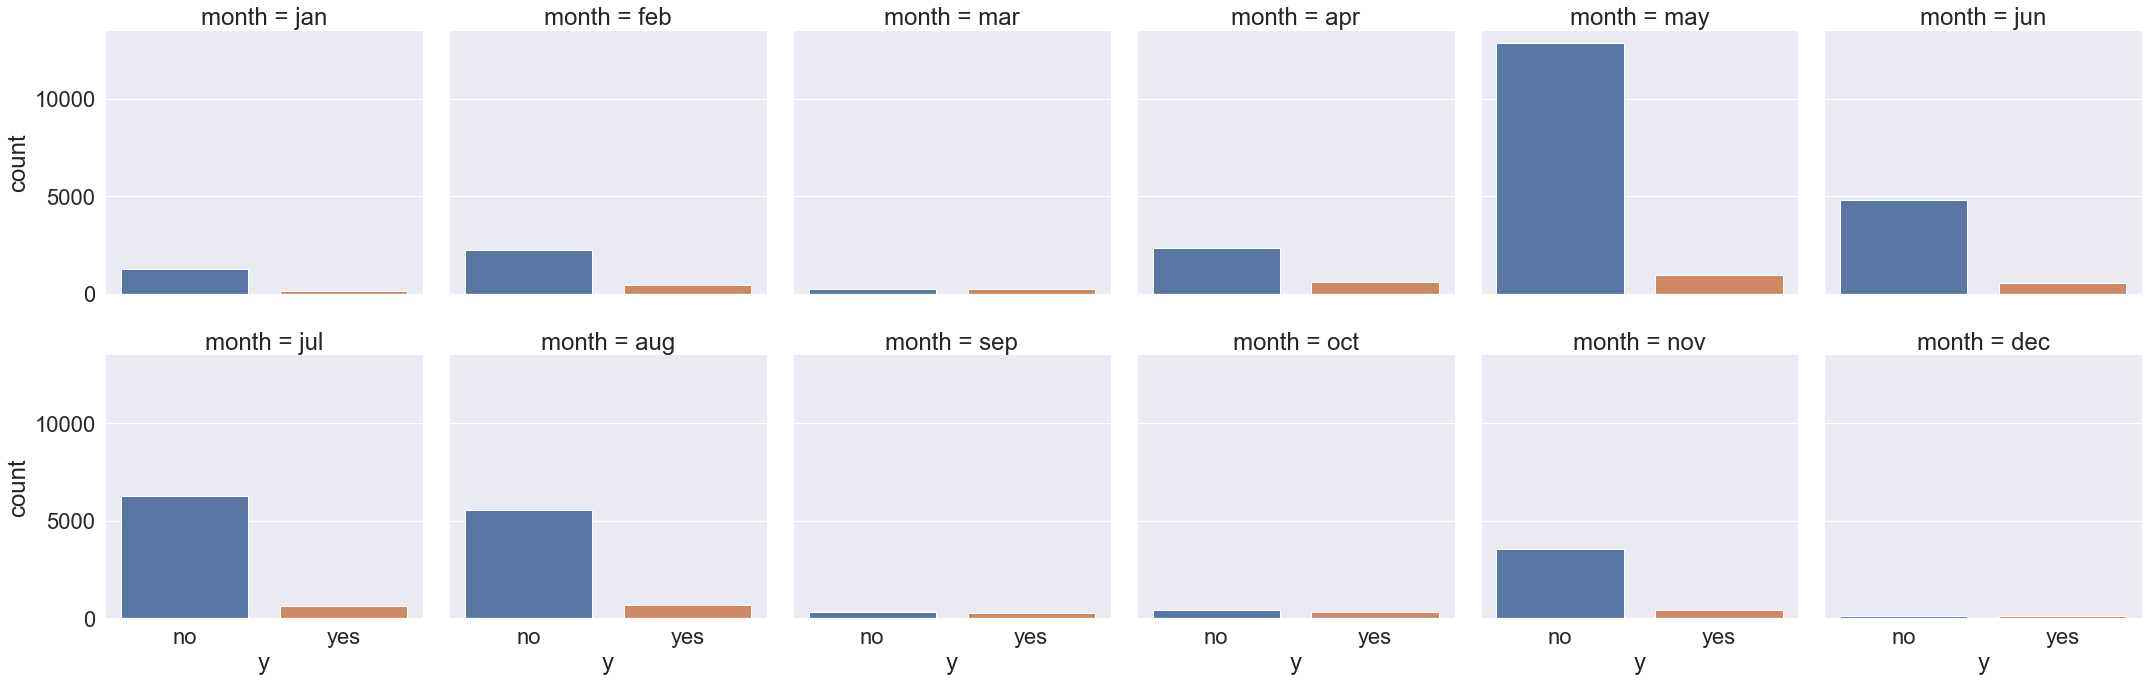

In [14]:
g = sns.catplot(x='y', col='month', kind='count', data=df, col_wrap=6, col_order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.show()

* #### May is the month with the highest interest for a term deposit.
* #### December is the month with the lowest interest for a term deposit.

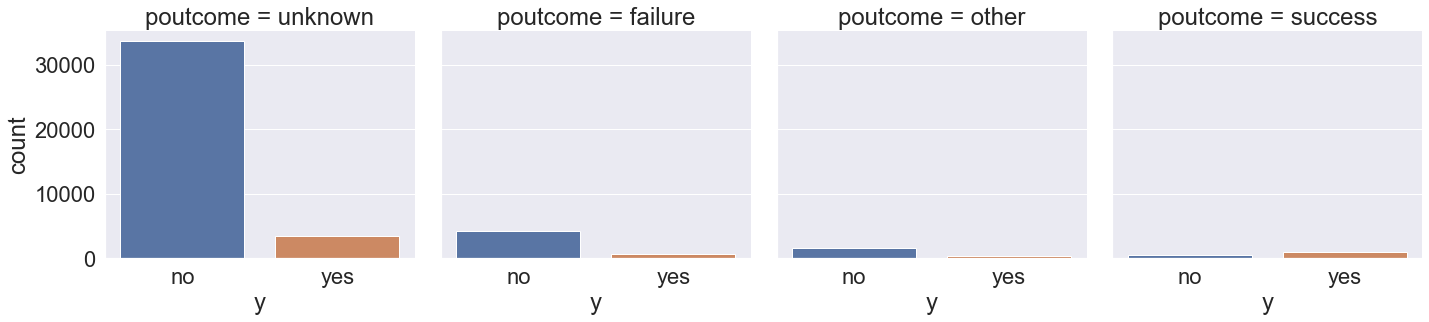

In [15]:
g = sns.catplot(x='y', col='poutcome', kind='count', data=df, col_wrap=4)
plt.show()

* #### If the pre-campaign outcome is successful, then there is a high chance of the client showing interest on deposit.

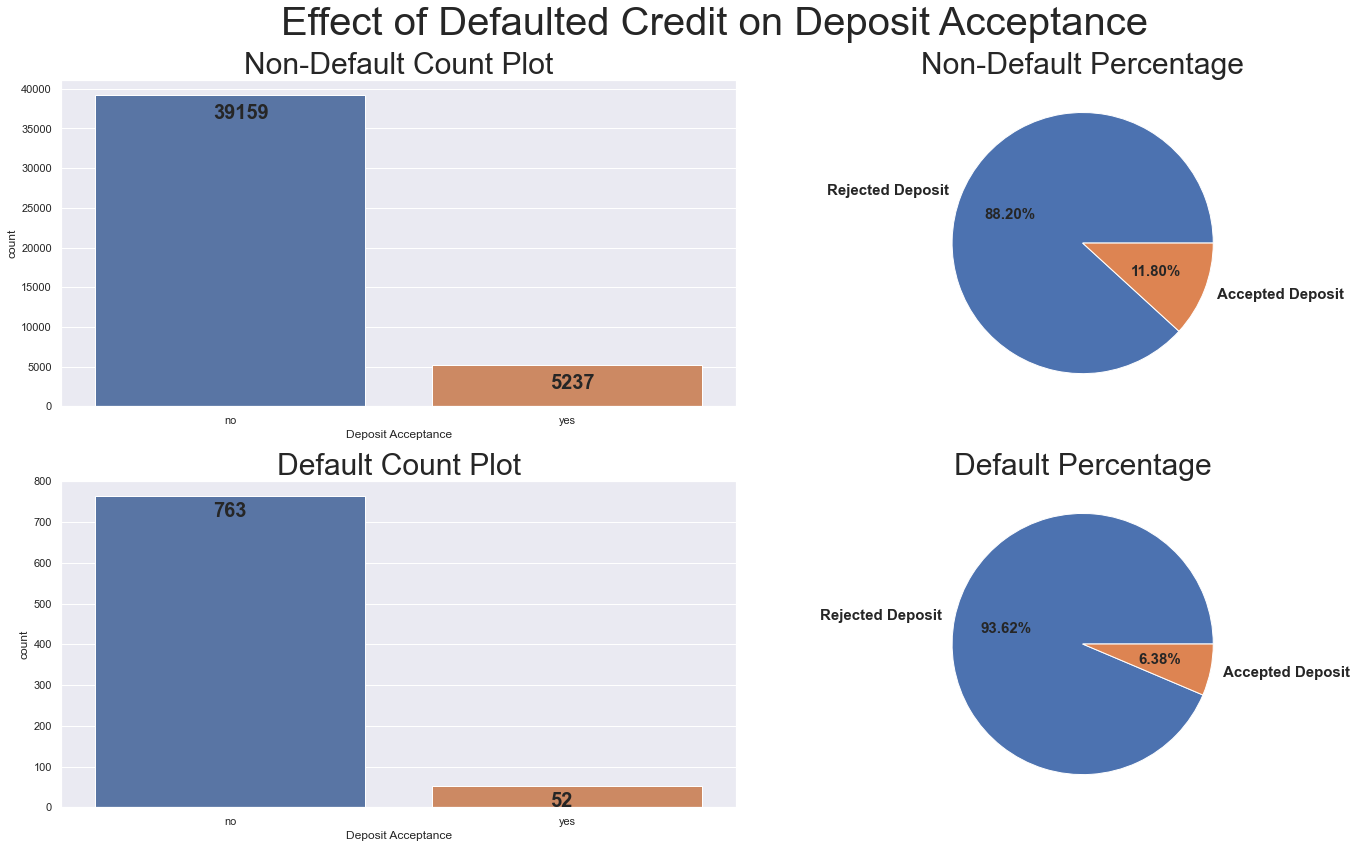

In [16]:
sns.set(font_scale=1)
fig, ax = plt.subplots(2,2, figsize=(20,12))

sns.countplot(df[df['default'] == 'no']['y'], ax=ax[0,0])
ax[0,0].set_title('Non-Default Count Plot', fontsize=30)
ax[0,0].set_xlabel('Deposit Acceptance')
for i in range(2):
    ax[0,0].text(i-0.05, df.groupby(['default', 'y']).size()[i]-3000,df.groupby(['default', 'y']).size()[i], fontsize=20, fontweight='bold')
    
ax[0,1].pie(df.groupby(['default', 'y']).size()[:2], labels=['Rejected Deposit', 'Accepted Deposit'], autopct='%.2f%%', textprops={'fontsize':15, 'fontweight':'bold'})
ax[0,1].set_title('Non-Default Percentage', fontsize=30)

sns.countplot(df[df['default'] == 'yes']['y'], ax=ax[1,0])
ax[1,0].set_title('Default Count Plot', fontsize=30)
ax[1,0].set_xlabel('Deposit Acceptance')
for i in range(2):
    ax[1,0].text(i-0.05, df.groupby(['default', 'y']).size()[i+2]-50,df.groupby(['default', 'y']).size()[i+2], fontsize=20, fontweight='bold')
ax[1,1].pie(df.groupby(['default', 'y']).size()[2:], labels=['Rejected Deposit', 'Accepted Deposit'], autopct='%.2f%%', textprops={'fontsize':15, 'fontweight':'bold'})
ax[1,1].set_title('Default Percentage', fontsize=30)
fig.suptitle('Effect of Defaulted Credit on Deposit Acceptance', fontsize=40)
fig.tight_layout()
plt.show()

* #### Although the amount of clients in the Non-Default category are significantly larger than Default, the percentages in regards to acceptance/rejection of a deposit are very close/similar. This suggests that the "default" attribute does not play a significant role in the prediction of our dependent variable.

# Exploring the Numerical Features

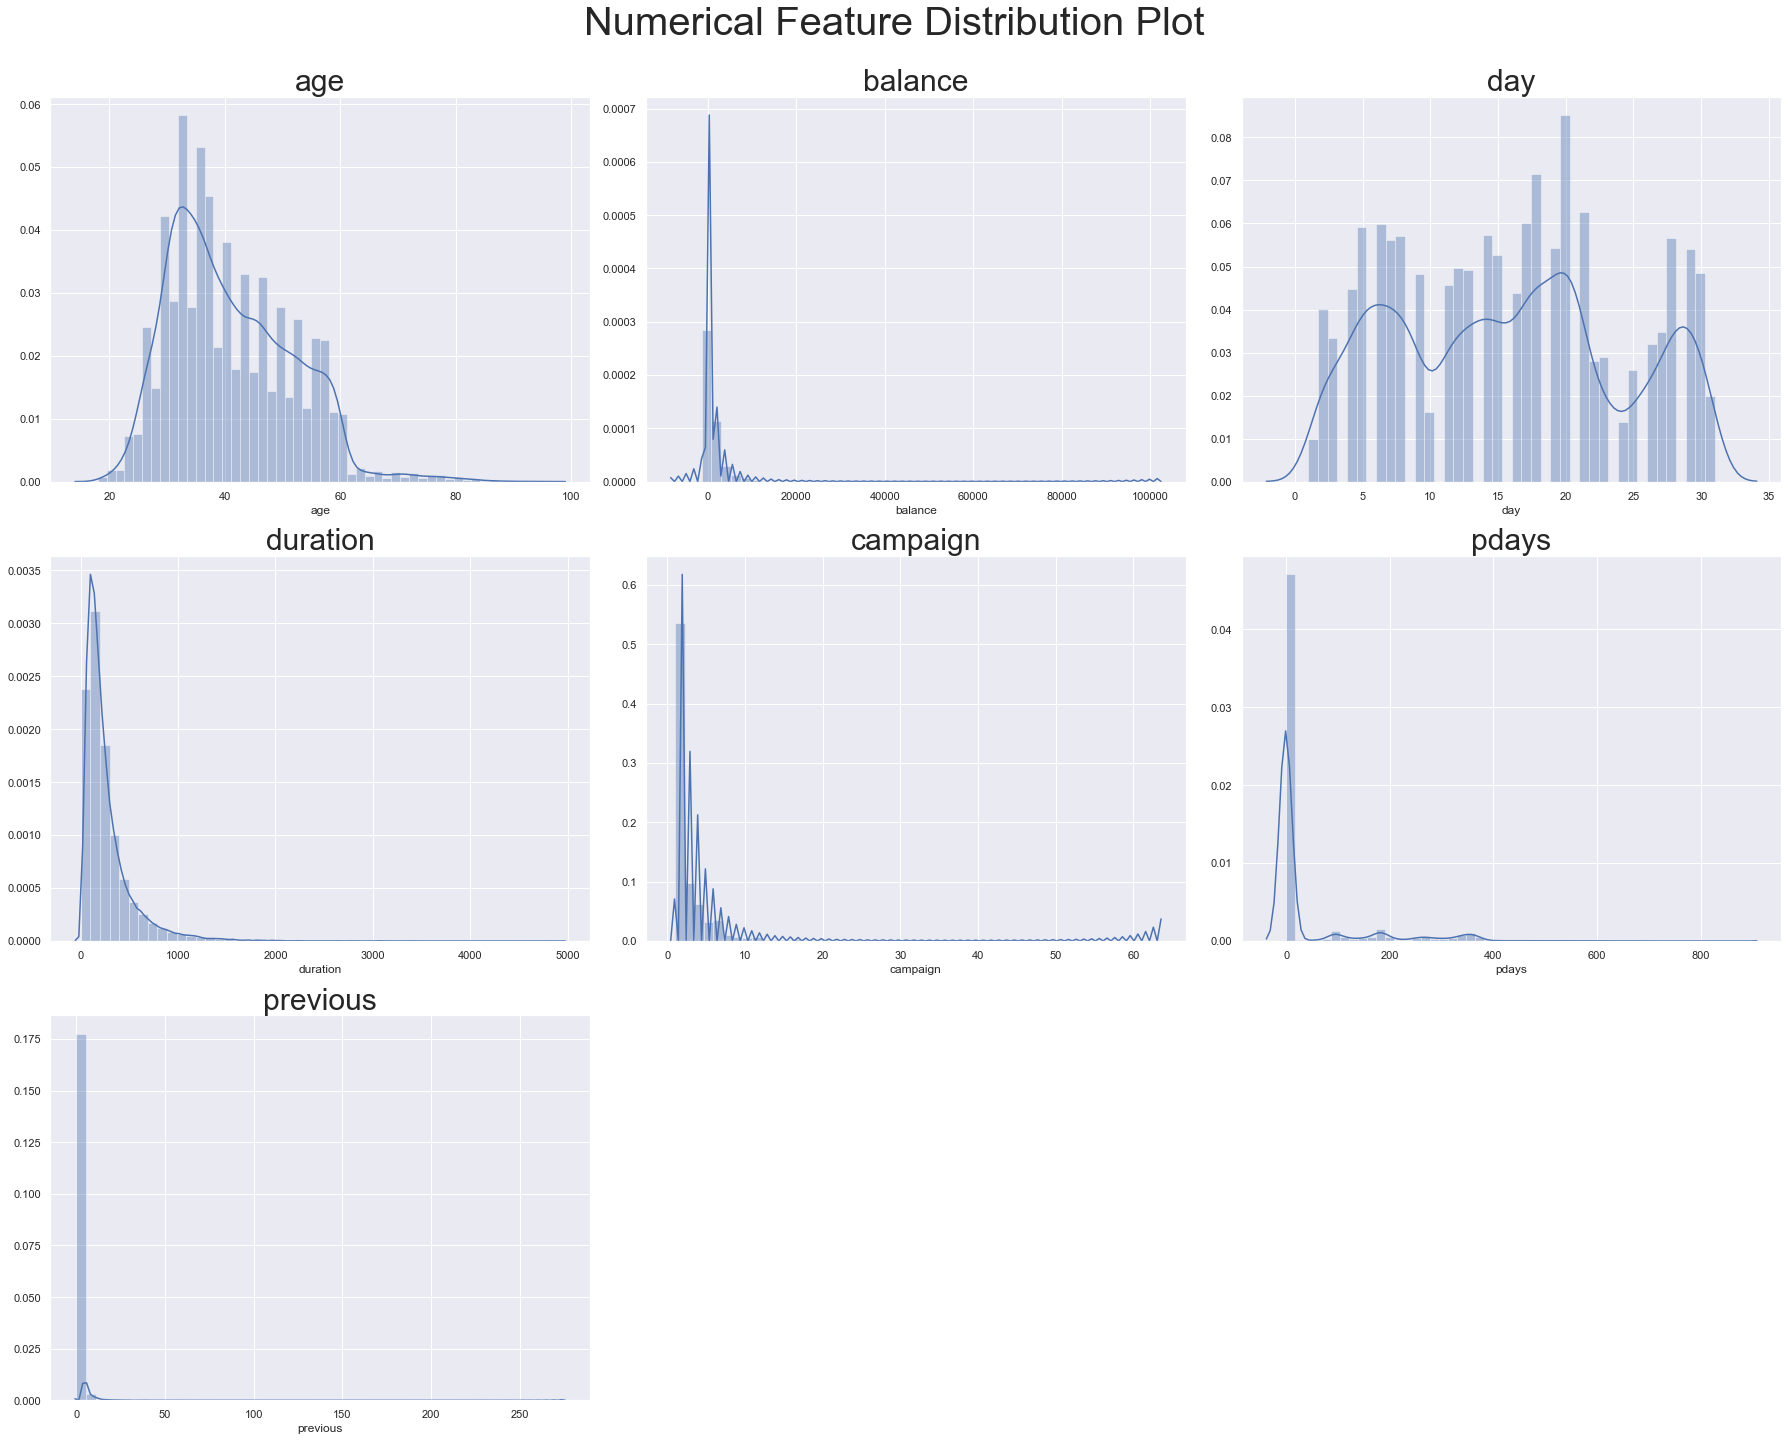

In [17]:
fig = plt.figure(figsize=(25,20))
plot = 1
for col in df.describe().columns:
    ax = plt.subplot(3,3,plot)
    sns.distplot(df[col])
    ax.set_title(col, fontsize=30)
    plot += 1
fig.suptitle('Numerical Feature Distribution Plot', fontsize=40, y=1)
plt.tight_layout()
plt.show()

* #### "age" and "day" seem approximately normally distributed.
* #### "balance", "duration", "campaign", "pdays", and "previous" are right-skewed, with the possibility of outliers present.

# Numerical Feature Boxplot by Deposit

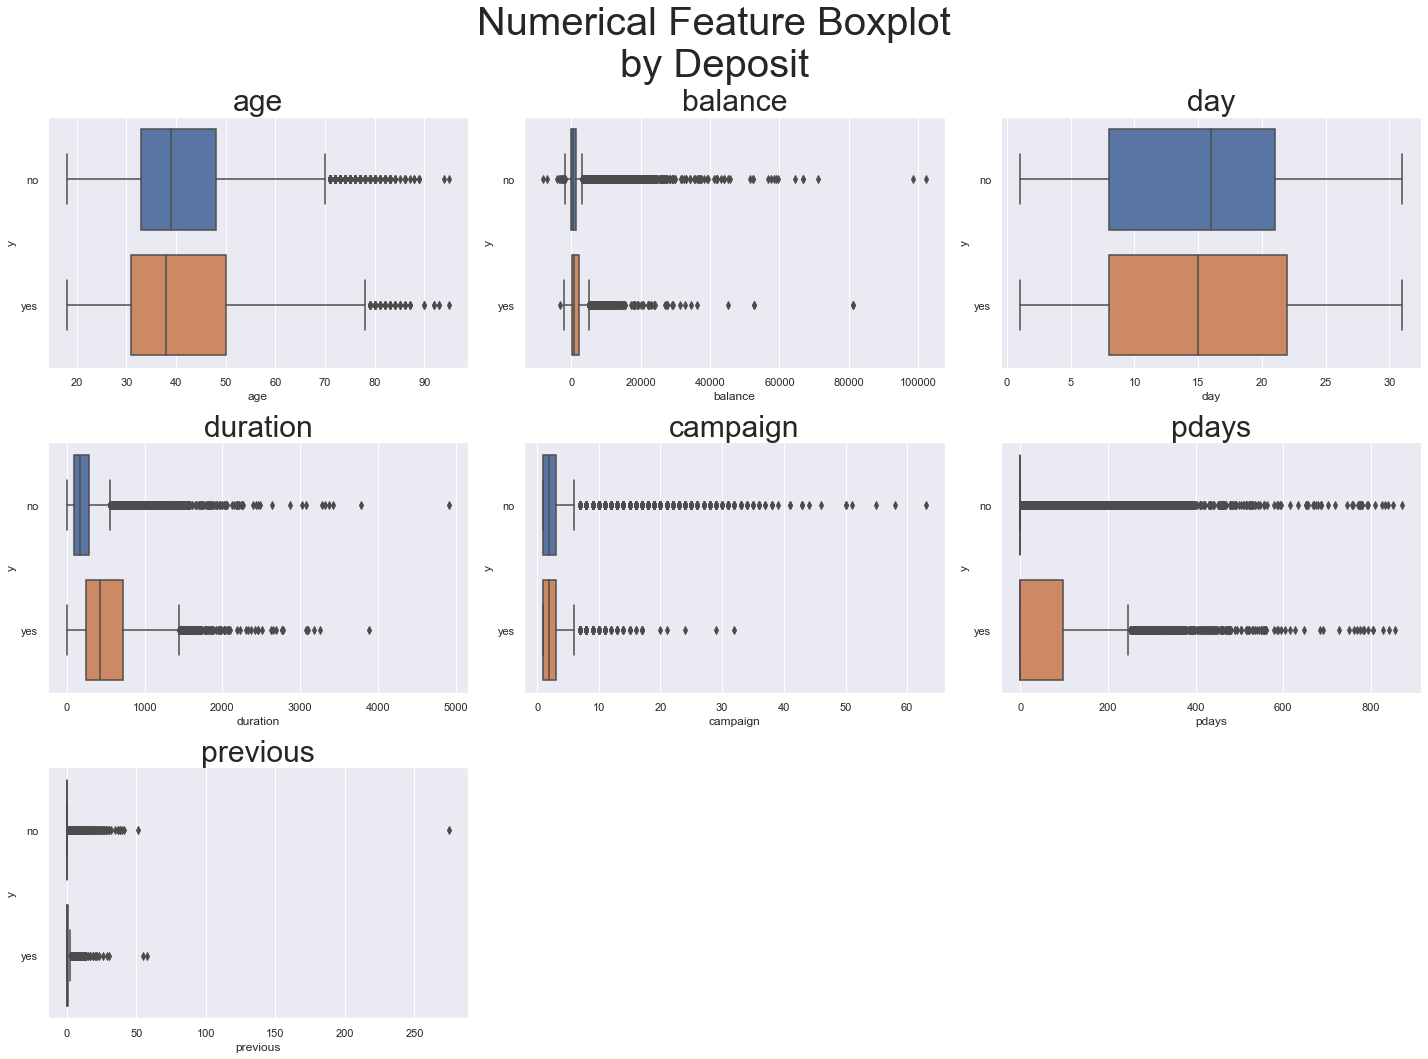

In [18]:
fig = plt.figure(figsize=(20,15))
plot = 1
for col in df.describe().columns:
    ax = plt.subplot(3,3,plot)
    ax.set_title(col, fontsize=30)
    sns.boxplot(x=col, y='y',data=df)
    plot += 1
fig.suptitle('Numerical Feature Boxplot\nby Deposit', fontsize=40)
fig.tight_layout()
plt.show()

* #### Clients who had longer call durations showed more interest towards the deposit.

# Numerical Feature Boxplot

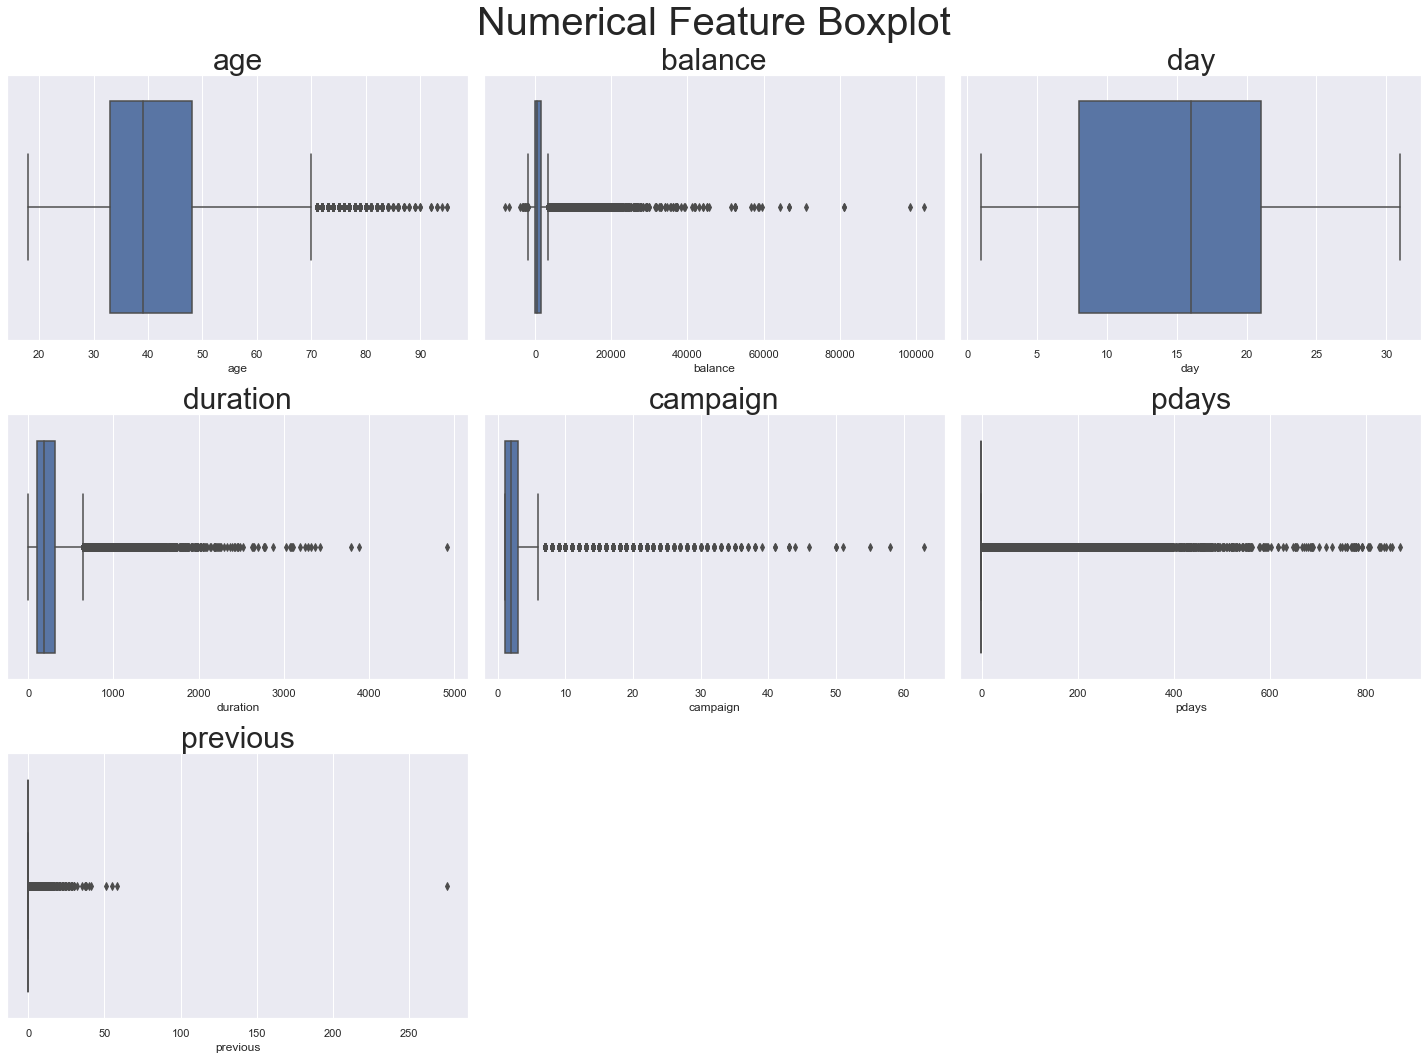

In [19]:
fig = plt.figure(figsize=(20,15))
plot = 1
for col in df.describe().columns:
    ax = plt.subplot(3,3,plot)
    ax.set_title(col, fontsize=30)
    sns.boxplot(x=col,data=df)
    plot += 1
fig.suptitle('Numerical Feature Boxplot', fontsize=40)
fig.tight_layout()
plt.show()

* #### Every attribute with the expection of "day" has outliers.

# Correlation Between Numerical Features

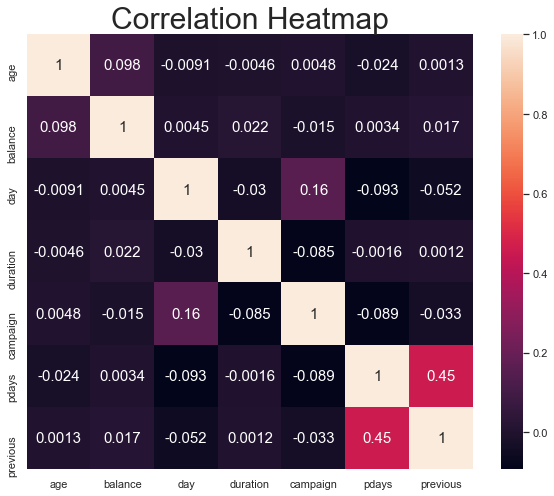

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, annot_kws={'fontsize':15})
plt.title('Correlation Heatmap', fontsize=30)
plt.show()

* #### It seems no feature is heavily correlated with other features.

# Feature Engineering
### As per Exploratory Data Analysis:
* ##### No missing values found.
* ##### No feature found with one value.
* ##### 9 categorical features
* ##### "default" attribute does not play an important role in prediction.
* ##### There may be a presence of outliers for the numerical features.

In [21]:
df2 = df.copy()
df2.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

## Dropping irrelevant features

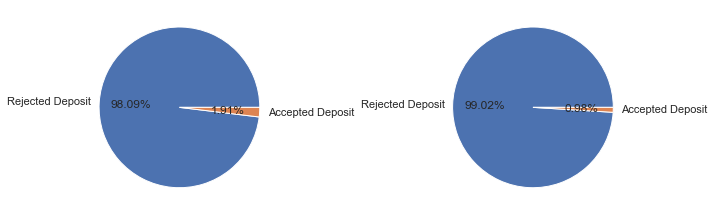

In [22]:
fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].pie(df2.groupby(['y', 'default']).size()[:2], labels=['Rejected Deposit', 'Accepted Deposit'], autopct='%.2f%%')
ax[1].pie(df2.groupby(['y', 'default']).size()[2:], labels=['Rejected Deposit', 'Accepted Deposit'], autopct='%.2f%%')
fig.tight_layout()
plt.show()

* #### "Default" feature does not play an important role in predicting deposit.

In [23]:
df2.drop('default', axis=1, inplace=True)

In [24]:
print(df2.groupby(['y', 'pdays']).size())
print(f"Value -1 for pdays corresponds to {np.round(len(df[df.pdays == -1]) / len(df)*100, 2)}% of all pdays entries.")

y    pdays
no   -1       33570
      1           9
      2          35
      3           1
      4           1
              ...  
yes   804         1
      805         1
      828         1
      842         1
      854         1
Length: 914, dtype: int64
Value -1 for pdays corresponds to 81.74% of all pdays entries.


* #### "pdays" does not play an important role in predicting deposit, since over 80% of the entries are -1.

In [25]:
df2.drop('pdays', axis=1, inplace=True)

## Removing Outliers

In [26]:
df2.groupby('age', sort=True).size()

age
18     12
19     35
20     50
21     79
22    129
     ... 
90      2
92      2
93      2
94      1
95      2
Length: 77, dtype: int64

* #### There are no significant outliers in the dataset, since the minimum age is 18 and the maximum age is 95.

In [27]:
df2.groupby(['y','balance'], sort=True).size()

y    balance
no   -8019      1
     -6847      1
     -4057      1
     -3372      1
     -3313      1
               ..
yes   34646     1
      36252     1
      45248     1
      52587     2
      81204     2
Length: 9258, dtype: int64

* #### These outliers will not be removed, since they show a relationship between account balance and acceptance of deposit. Clients with low or negative balance tend to reject the deposit, and vice-verca.

In [28]:
df2.groupby(['y', 'campaign'], sort=True).size()

y    campaign
no   1           14983
     2           11104
     3            4903
     4            3205
     5            1625
                 ...  
yes  20              1
     21              1
     24              1
     29              1
     32              1
Length: 70, dtype: int64

* #### These outliers will not be removed, since they show a relationship between the number of contacts performed for the client and acceptance of the deposit. Clients that received more contact calls are more likely to accept a deposit, and vice-verca.

In [29]:
df2.groupby(['y', 'duration'], sort=True).size()

y    duration
no   0            3
     1            2
     2            3
     3            4
     4           15
                 ..
yes  3094         1
     3102         1
     3183         1
     3253         1
     3881         1
Length: 2627, dtype: int64

* #### These outliers will not be removed, since they show a relationship between time(in seconds) spent in contact and acceptance of the deposit. Clients that stayed on the phone longer are more likely to accept a deposit, and vice-verca.

In [30]:
with pd.option_context('display.max_rows', None):
    print(df2.groupby(['y', 'campaign'], sort=True).size())

y    campaign
no   1           14983
     2           11104
     3            4903
     4            3205
     5            1625
     6            1199
     7             688
     8             508
     9             306
     10            252
     11            185
     12            151
     13            127
     14             89
     15             80
     16             77
     17             63
     18             51
     19             44
     20             42
     21             34
     22             23
     23             22
     24             19
     25             22
     26             13
     27             10
     28             16
     29             15
     30              8
     31             12
     32              8
     33              6
     34              5
     35              4
     36              4
     37              2
     38              3
     39              1
     41              2
     43              3
     44              1
     46             

* #### Clients with "no" for deposit and number of campaign calls higher than clients with "yes" for deposit will be treated as outliers, since the majority of clients with no interest in a deposit get significantly less calls.

In [31]:
df2 = df2.loc[df2.campaign < 33]

In [32]:
with pd.option_context('display.max_rows', None):
    print(df2.groupby(['y', 'previous'], sort=True).size())

y    previous
no   0           33532
     1            2189
     2            1650
     3             848
     4             543
     5             338
     6             194
     7             151
     8              90
     9              68
     10             41
     11             50
     12             34
     13             29
     14             14
     15             19
     16             13
     17             12
     18              6
     19              9
     20              7
     21              3
     22              5
     23              7
     24              5
     25              4
     26              1
     27              5
     28              2
     29              3
     30              2
     32              1
     35              1
     37              2
     38              2
     40              1
     41              1
     51              1
     275             1
yes  0            3384
     1             583
     2             456
     3             2

* #### Clients that received more than 30 non-campaign calls will be treated as outliers.

In [33]:
df2 = df2.loc[df2.previous < 31]

## Converting Categorical to Dummy/Indicator Variables

In [34]:
df2.head()

age           job  marital  education  balance housing loan  contact  day  \
0   58    management  married   tertiary     2143     yes   no  unknown    5   
1   44    technician   single  secondary       29     yes   no  unknown    5   
2   33  entrepreneur  married  secondary        2     yes  yes  unknown    5   
3   47   blue-collar  married    unknown     1506     yes   no  unknown    5   
4   33       unknown   single    unknown        1      no   no  unknown    5   

  month  duration  campaign  previous poutcome   y  
0   may       261         1         0  unknown  no  
1   may       151         1         0  unknown  no  
2   may        76         1         0  unknown  no  
3   may        92         1         0  unknown  no  
4   may       198         1         0  unknown  no

In [35]:
df2 = pd.get_dummies(df2, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'])
df2.head()

age  balance housing loan  day  duration  campaign  previous   y  \
0   58     2143     yes   no    5       261         1         0  no   
1   44       29     yes   no    5       151         1         0  no   
2   33        2     yes  yes    5        76         1         0  no   
3   47     1506     yes   no    5        92         1         0  no   
4   33        1      no   no    5       198         1         0  no   

   job_admin.  ...  month_jun  month_mar  month_may  month_nov  month_oct  \
0           0  ...          0          0          1          0          0   
1           0  ...          0          0          1          0          0   
2           0  ...          0          0          1          0          0   
3           0  ...          0          0          1          0          0   
4           0  ...          0          0          1          0          0   

   month_sep  poutcome_failure  poutcome_other  poutcome_success  \
0          0                 0               0                 0   
1          0                 0               0                 0   
2          0                 0               0                 0   
3          0                 0               0                 0   
4          0                 0               0                 0   

   poutcome_unknown  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  

[5 rows x 47 columns]

## Mapping Binary Categorical Variables to 0/1

In [36]:
for col in ['housing', 'loan', 'y']:
    df2[col] = df2[col].map({'yes': 1, 'no': 0})
df2.loc[:,['housing', 'loan', 'y']].head()

housing  loan  y
0        1     0  0
1        1     0  0
2        1     1  0
3        1     0  0
4        0     0  0

In [48]:
pd.options.display.max_columns

20

In [50]:
pd.options.display.max_columns = 47
df2.head()

age  balance  housing  loan  day  duration  campaign  previous  y  \
0   58     2143        1     0    5       261         1         0  0   
1   44       29        1     0    5       151         1         0  0   
2   33        2        1     1    5        76         1         0  0   
3   47     1506        1     0    5        92         1         0  0   
4   33        1        0     0    5       198         1         0  0   

   job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0           0                0                 0              0   
1           0                0                 0              0   
2           0                0                 1              0   
3           0                1                 0              0   
4           0                0                 0              0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0               1            0                  0             0            0   
1               0            0                  0             0            0   
2               0            0                  0             0            0   
3               0            0                  0             0            0   
4               0            0                  0             0            0   

   job_technician  job_unemployed  job_unknown  marital_divorced  \
0               0               0            0                 0   
1               1               0            0                 0   
2               0               0            0                 0   
3               0               0            0                 0   
4               0               0            1                 0   

   marital_married  marital_single  education_primary  education_secondary  \
0                1               0                  0                    0   
1                0               1                  0                    1   
2                1               0                  0                    1   
3                1               0                  0                    0   
4                0               1                  0                    0   

   education_tertiary  education_unknown  contact_cellular  contact_telephone  \
0                   1                  0                 0                  0   
1                   0                  0                 0                  0   
2                   0                  0                 0                  0   
3                   0                  1                 0                  0   
4                   0                  1                 0                  0   

   contact_unknown  month_apr  month_aug  month_dec  month_feb  month_jan  \
0                1          0          0          0          0          0   
1                1          0          0          0          0          0   
2                1          0          0          0          0          0   
3                1          0          0          0          0          0   
4                1          0          0          0          0          0   

   month_jul  month_jun  month_mar  month_may  month_nov  month_oct  \
0          0          0          0          1          0          0   
1          0          0          0          1          0          0   
2          0          0          0          1          0          0   
3          0          0          0          1          0          0   
4          0          0          0          1          0          0   

   month_sep  poutcome_failure  poutcome_other  poutcome_success  \
0          0                 0               0                 0   
1          0                 0               0                 0   
2          0                 0               0                 0   
3          0                 0               0                 0   
4          0                 0               0                 0   

   poutcome_unknown  


In [54]:
df2['y'].value_counts()

0    39874
1     5287
Name: y, dtype: int64

## Split Dataset into Training Set and Test Set

In [38]:
from sklearn.model_selection import train_test_split
X = df2.drop('y', axis=1)
y = df2['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
for var, txt in zip([X_train, X_test, y_train, y_test], ['X_train', 'X_test', 'y_train', 'y_test']):
    print(f"{txt}.shape: {var.shape}")

X_train.shape: (36128, 46)
X_test.shape: (9033, 46)
y_train.shape: (36128,)
y_test.shape: (9033,)


# Model Selection

### We will use cross-validation to find the mean accuracy of different classification models.

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

In [56]:
models = [LogisticRegression(), SVC(), DecisionTreeClassifier(), GaussianNB(), KNeighborsClassifier(), RandomForestClassifier(), XGBClassifier()]

In [57]:
results = {
    'model': [],
    'score': []
}
for model in models:
    model_score = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5)
    results['model'].append(str(model).split('(')[0])
    results['score'].append(model_score.mean())

D:\anaconda3\envs\my-env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda3\envs\my-env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[12:42:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda3\envs\my-env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:42:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda3\envs\my-env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:42:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda3\envs\my-env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:42:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda3\envs\my-env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:42:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [59]:
pd.DataFrame(results).sort_values(by='score', ascending=False)

model     score
6           XGBClassifier  0.906084
5  RandomForestClassifier  0.905254
0      LogisticRegression  0.891663
1                     SVC  0.883802
4    KNeighborsClassifier  0.877768
2  DecisionTreeClassifier  0.875498
3              GaussianNB  0.860801

#### XGBClassifier has the highest mean accuracy score out of all the models.

In [77]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
params = {
    'learning_rate': list(np.arange(0.01,0.5,0.05)),
    'max_depth': [3,5,10,20],
    'n_estimators': [10,15,25,50,75,100,150,200]
}
grid = GridSearchCV(estimator=xgb, param_grid=params, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n...
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, use_label_encoder=False,
                                     validate_parameters=None, verbosity=None),
          

In [80]:
xgb = grid.best_estimator_
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

In [120]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(f"{'='*60}\nAccuracy Score(Train): {xgb.score(X_train, y_train)}")
print(f"Accuracy Score(Test): {xgb.score(X_test, y_test)}\n{'='*60}")
print(f"{'='*60}\nClassification Report:\n{classification_report(y_test, xgb_pred)}\n{'='*60}")
print(f"{'='*60}\nConfusion Matrix:\n{pd.DataFrame(confusion_matrix(y_test, xgb_pred), index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])}\n{'='*60}")

Accuracy Score(Train): 0.9288086802480071
Accuracy Score(Test): 0.905236355585077
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7952
           1       0.64      0.47      0.54      1081

    accuracy                           0.91      9033
   macro avg       0.79      0.72      0.75      9033
weighted avg       0.90      0.91      0.90      9033

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0         7668          284
Actual 1          572          509


#### With hyper-parameter turning, XGBClassifier is able to achieve 90% accuracy.